## Ejercicio - Regresión Viviendas Barcelona

- Utilizando el dataset de publicaciones de venta de viviendas en Barcelona _**viviendas_barcelona.parquet**_, entrena un modelo de regresión lineal múltiple que sea capaz de calcular el precio de venta:

    - Antes de crear el modelo y entrenarlo, haz un **EDA** de los datos.
        - ¿Qué columnas pueden ser las más importantes?
        - ¿Como se distribuyen los precios?
        - ¿Qué columnas sería factible limpiar?
        - ¿Qué significan los **np.nan**?
     
    - Cuando entiendas bien los datos con los que estás tratando, puedes proceder a realizar un preprocesamiento:
        - Elimina duplicados.
        - Elimina columnas innecesarias
        - Trata los valores perdidos **np.nan**.
        - Maneja los outliers como consideres.
        - Realiza transformaciones a los datos que consideres necesarias.
        - Codifica los datos categóricos para que el modelo los entienda (pásalos a números).
        - Considera normalizar los datos antes de utilizarlos para el entreno.
        
    - Entrena el modelo con un subconjunto de 70-80% del dataset.
      
    - Utiliza los datos restantes para comprobar cómo de bueno es el modelo:
        - Calcula **R2**, **MAE** y **MSE**.
        
- Importa las librerías que vayas a necesitar.

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelo
from sklearn.linear_model import LinearRegression

# Herramientas de preprocesamiento
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, TargetEncoder, OneHotEncoder

# Split
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [148]:
df = pd.read_parquet("viviendas_barcelona.parquet")
df.head()


,price,title,province,location,lat,lng,agency,updated,timestamp,id_1,...,Consumo,Habitaciones,Referencia,Antigüedad,Garaje,Terraza,Se aceptan mascotas,Ascensor,Tipo de casa,Superficie útil
0,52000.0,"Piso en venta en Avenida Casetes, nº 33",barcelona,"Avenida Casetes, nº 33. Centre Vila (Vilafranc...",41.348350,1.701970,Inmuebles de Aliseda Inmobiliaria,1.672874e+09,1.697761e+15,34241677924,...,A B C D E F G,3,ASR1-SRB0000036956,None,None,None,None,None,None,None
1,315000.0,Casa adosada en venta en Vilafranca del Penedes,barcelona,Castellet i la Gornal,41.276503,1.652229,Inmuebles de Engel & Völkers Barcelona,1.672701e+09,1.697761e+15,23357117200,...,None,4,IF76306-I-00VJM3-W-02OAMJ,None,1,Terraza,None,None,Adosada,None
2,650000.0,Casa unifamiliar en venta en Sant Sadurní d'Anoia,barcelona,Sant Sadurní d'Anoia,41.426682,1.792630,Inmuebles de SAFTI ESPAÑA,1.674861e+09,1.697761e+14,32584643160,...,None,5,SA3541-REF_11510,None,2,Terraza,None,None,Unifamiliar,220 m²
3,315000.0,Casa en venta en Carrer de Sant Pere Molanta,barcelona,Carrer de Sant Pere Molanta. Olèrdola,41.318658,1.754891,Inmuebles de ALARCON PROPIEDADES,1.673997e+09,1.697761e+15,19202422630,...,None,3,4017-4751,Entre 30 y 50 años,1,Terraza,Se aceptan mascotas,None,None,100 m²
4,209900.0,"Chalet en venta en Calle Carrer Serral Llarg, ...",barcelona,"Calle Carrer Serral Llarg, nº 107. Olesa de Bo...",41.369700,1.876770,Inmuebles de FINCAS MARINA,1.674256e+09,1.697761e+15,35859429926,...,None,3,SA3007-08353,None,None,Terraza,None,None,None,398 m²


In [149]:
df["agency"].nunique()

1329

In [150]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,26969.0,NaN,NaN,NaN,425521.191071,569359.251647,15500.0,178000.0,270500.0,450000.0,19000000.0
title,27129,12706,Piso en venta en Centre,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province,27479,1,barcelona,27479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,26873,8467,Castellar del Vallès,292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,26873.0,NaN,NaN,NaN,41.501189,0.299589,0.0,41.387962,41.494441,41.576186,42.283257
lng,26873.0,NaN,NaN,NaN,2.122537,0.223253,0.0,2.018452,2.130845,2.218178,3.81478
agency,27129,1329,Inmuebles de Engel & Völkers Barcelona,2187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
updated,27129.0,NaN,NaN,NaN,1673576703.102952,3085560.077187,1579389000.0,1673392200.0,1673996700.0,1674169800.0,1675120080.0
timestamp,27479.0,NaN,NaN,NaN,1547226005864556.5,458334075217094.8125,169789023054.0,1697790317799740.0,1697840050993678.0,1697888434903166.0,1697946906943147.0
id_1,27479,27479,34195182232,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27479 entries, 0 to 27478
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  26969 non-null  float64
 1   title                  27129 non-null  object 
 2   province               27479 non-null  object 
 3   location               26873 non-null  object 
 4   lat                    26873 non-null  float64
 5   lng                    26873 non-null  float64
 6   agency                 27129 non-null  object 
 7   updated                27129 non-null  float64
 8   timestamp              27479 non-null  float64
 9   id_1                   27479 non-null  object 
 10  id_2                   27479 non-null  object 
 11  Superficie construida  26978 non-null  object 
 12  Emisiones              16335 non-null  object 
 13  Clasificación          27129 non-null  object 
 14  Baños                  26185 non-null  object 
 15  Co

In [152]:
# Posibles columnas a descartar:
df.drop(['id_1', 'id_2', 'updated', 'timestamp', 'province', 'Referencia', 'location', 'Consumo', 'Se aceptan mascotas' ], axis= 1, inplace=True)

In [153]:
print(df.head())

      price                                              title        lat  \
0   52000.0            Piso en venta en Avenida Casetes, nº 33  41.348350   
1  315000.0    Casa adosada en venta en Vilafranca del Penedes  41.276503   
2  650000.0  Casa unifamiliar en venta en Sant Sadurní d'Anoia  41.426682   
3  315000.0       Casa en venta en Carrer de Sant Pere Molanta  41.318658   
4  209900.0  Chalet en venta en Calle Carrer Serral Llarg, ...  41.369700   

        lng                                  agency Superficie construida  \
0  1.701970       Inmuebles de Aliseda Inmobiliaria                 88 m²   
1  1.652229  Inmuebles de Engel & Völkers Barcelona                179 m²   
2  1.792630               Inmuebles de SAFTI ESPAÑA                253 m²   
3  1.754891        Inmuebles de ALARCON PROPIEDADES                198 m²   
4  1.876770              Inmuebles de FINCAS MARINA                494 m²   

                           Emisiones             Clasificación Baños  \
0 

In [154]:
# Procesar superficie
#df[['Superficie contruida', 'Superficie útil']].isnull()

#quitar m2, quitar puntos
def extraer_superficie_num(superficie):
    try:
        return int(superficie.split()[0].replace('.',''))
    except:
        return np.nan
    
df['Superficie construida'] = df['Superficie construida'].apply(extraer_superficie_num)
median = df['Superficie construida'].median()
df['Superficie construida'] = df['Superficie construida'].fillna(median).round().astype(int)

In [155]:
df['Superficie útil'] = df['Superficie útil'].apply(extraer_superficie_num)

def fill_superficie_util(row):
    if pd.isnull(row['Superficie útil']):
        return row['Superficie construida'] * 0.85
    else:
        return row['Superficie útil']

# opcion 1 a nivel de todo el dataframe
# opcion 2 usar filtro
df['Superficie útil'] = df.apply(fill_superficie_util, axis=1)


In [156]:
#tratar columna emisiones
#df['Emisiones'].unique()

def extraer_emisiones_num(superficie):
    try:
        return float(superficie.strip().split()[0].replace(',','.'))
    except:
        return np.nan
    
df['Emisiones'] = df['Emisiones'].apply(extraer_emisiones_num).isna().sum()
median = df['Emisiones'].median()
df['Emisiones'] = df['Emisiones'].fillna(median).round(2).astype(float)

In [157]:
# tratar columna agency: 
# Estrategia 1: crear columna agency_size que represente el num de prop en ventar para esa agency 
# 2 Discretizarla en grupos individual,pequeña, mediana, grande 
# 3: Crear una columna con el percentil del tamaño de la empresa
# 4: precio medio de la agencia para predecir
df['agency'] = df['agency'].fillna('Other')
df['agency_size'] = df['agency'].map(df['agency'].value_counts()) #Estrategia 1
df[['agency', 'agency_size']]

,agency,agency_size
0,Inmuebles de Aliseda Inmobiliaria,493
1,Inmuebles de Engel & Völkers Barcelona,2187
2,Inmuebles de SAFTI ESPAÑA,95
3,Inmuebles de ALARCON PROPIEDADES,30
4,Inmuebles de FINCAS MARINA,31
...,...,...
27474,Inmuebles de Engel & Völkers Barcelona,2187
27475,Inmuebles de ESPAI HABITAT,28
27476,Inmuebles de Engel & Völkers Barcelona,2187
27477,Inmuebles de AGC FINQUES,17


In [158]:
#TRATAMIENTO ASCENSOR
# con ascensor, sin ascensor, otros
df['Ascensor'].unique()
def categorizar_ascensor(valor):
    if pd.isnull(valor):
        return 0

    valor = valor.strip().lower()
    mapa_ascensor = {None: 0,
        'ascensor': 1,
        'con ascensor': 1,
        'del pis al pk': 1,
        '2': 1,
        'comedor y habitación': 1,
        '2 ascensores en finca': 1,
        'en proceso': 1,
        'no': 0,
        'ascensor disponible para acceder al terrado a tend': 1,
        '2 ascensores': 1,
        '4 personas 300kgs': 1,
        'comunica con el parking': 1,
        'en perfecto estado': 1,
        'solo para los que viven en la 3 planta.': 1,
        '1 o 2 personas': 1,
        'amplio para silla de ruedas': 1,
        'entre rellano': 1,
        '4 personas 320kgs': 1,
        '3 ( hay 3 escaleras)': 1,
        'si amplio': 1,
        'si, escalera b': 1,
        '2 ascensores ( escalera a)': 1,
        '3 personas 300kgs': 1,
        '4 ascensores': 1,
        '4': 1,
        'dos ascensores': 1,
        '3 ascensores en la finca': 1,
        'en proyecto': 1,
        'la caja de gero termo-acustico para reducir ruidos': 1,
        'emplio': 1,
        'pre-instalación': 1,
        'si': 1,
        'privado sólo para los áticos.': 0,
        'conecta parking, viviendas y trasteros': 1,
        'por uno cada siete vecinos': 1,
        'de uso exclusivo para los áticos': 0,
        'finca con ascensor': 1,
        'interior': 1,
        'no, solo es un primero': 0,
        'no hay ascensor': 0,
        'dos': 1,
        '4 por rellano': 1,
        'dos por planta': 1,
        'de 4 por planta': 1,
        'proyecto de ascensor aprobado': 1,
        'true': 1,
        'hasta el parquing': 1,
        'ascensor renovado moderno': 1,
        'nuevo': 1,
        'al ser planta baja, no hace uso de él.': 0,
        'solo 3 vecinos': 0,
        'directo a la vivienda': 1,
        '2 ascensores en la finca': 1,
        'reformado': 1}
    return mapa_ascensor.get(valor, 0)
    

df['Ascensor'] = df['Ascensor'].apply(categorizar_ascensor).astype(np.bool)

In [159]:
#tratamiento terraza, 1 si tiene valores, 0 si no tiene valores
def binarizar_terraza(valor):
    try:
        if pd.isnull(valor) or valor is None or len(valor) == 0 or 'no' in valor.strip().lower():
            return False
        else:
            return True
    except:
        return False

df['Terraza'] = df['Terraza'].apply(binarizar_terraza).astype(np.bool)
df['Terraza'].value_counts()

Terraza
False    14886
True     12593
Name: count, dtype: int64

In [160]:
#tratamiento baños

def categorizar_bath(valor):
    if pd.isnull(valor): 
        return 0
    valor = int(valor)
    if valor <= 0:
        return 0
    elif valor >= 9:
        return 9
    else:
        return valor
df['Baños'] = df['Baños'].apply(categorizar_bath)
df['Baños'].value_counts()

Baños
2    10245
1    10079
3     3640
0     1295
4     1245
5      484
6      229
7      114
9       91
8       57
Name: count, dtype: int64

In [161]:
#tratamiento habitaciones

def categorizar_bed(valor):
    if pd.isnull(valor): 
        return 0
    valor = int(valor)
    if valor <= 0:
        return 0
    elif valor >= 11:
        return 11
    else:
        return valor
df['Habitaciones'] = df['Habitaciones'].apply(categorizar_bed).astype(int)
df['Habitaciones'].value_counts()

Habitaciones
3     10668
4      6398
2      3917
5      2278
0      1308
1      1058
6       910
7       436
8       181
11      147
9       106
10       72
Name: count, dtype: int64

In [162]:
#quitamos los de precio null
df_to_pred =df[df['price'].isna()]
df = df[~df['price'].isna()]


In [163]:
df_to_eda = df[['Habitaciones', 'Baños', 'Terraza', 'Ascensor',
                'lat', 'lng', 'agency_size', 'Superficie construida', 'Superficie útil',
                'Emisiones', 'price', 'garaje']]
df_to_eda1 = df[['Habitaciones', 'Baños', 'agency_size', 'price']]

<Axes: >

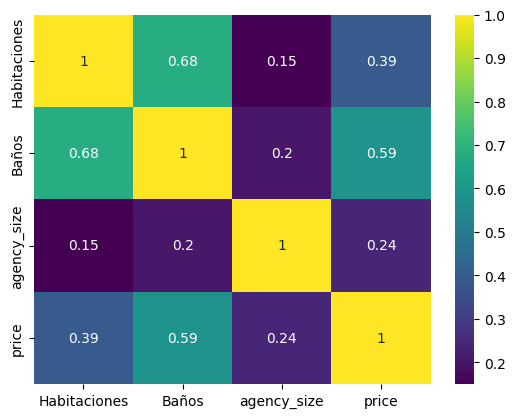

In [164]:
sns.heatmap(df_to_eda1.corr().round(2), cmap='viridis', annot=True)

In [165]:
df_to_model = df[['Habitaciones', 'Baños', 'Terraza', 'agency_size', 'price']]


In [166]:
X = df_to_model.drop('price', axis=1)
y = df_to_model['price']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [172]:
df_resultados= pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE', 'MAPE'])
models = {
    'RLM': LinearRegression(),
    'KNN k = 3': KNeighborsRegressor(n_neighbors=3),
    'KNN k = 5': KNeighborsRegressor(n_neighbors=5),
    'KNN k = 7': KNeighborsRegressor(n_neighbors=7),
    'DT depth = 5': DecisionTreeRegressor(max_depth=5),
    'DT depth k = no': DecisionTreeRegressor(),
    'RF 100' : RandomForestRegressor(),
    'RF 150': RandomForestRegressor(n_estimators=150),
    'SVR 1': SVR(C=1),
    'SVR 10': SVR(C=10),
    'SVR 1000': SVR(C=1000)
}

In [173]:
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [name, r2, mae, rmse, mape] 

df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
3,KNN k = 7,0.453544,177997.033882,399613.075172,0.460183
2,KNN k = 5,0.440558,182642.380002,404333.398854,0.477722
5,DT depth = 5,0.438411,192512.273333,405108.513015,0.533485
0,RLM,0.385515,216417.303020,423757.849745,0.625065
1,KNN k = 3,0.368901,192688.352202,429448.204671,0.494235
7,RF 100,0.334863,189484.596117,440877.044894,0.493163
8,RF 150,0.334257,189656.195602,441078.057625,0.493811
4,KNN k = 1700,0.085748,258993.833386,516886.258948,0.908219
11,SVR 1000,-0.019189,233052.749589,545744.639995,0.558227
6,DT depth k = no,-0.065076,206774.519255,557894.938634,0.514544


In [170]:
df_resultados.sort_values('R2', ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
4,KNN k = 17,0.463063,173217.479269,396117.090288,0.449117
3,KNN k = 7,0.453544,177997.033882,399613.075172,0.460183
2,KNN k = 5,0.440558,182642.380002,404333.398854,0.477722
5,DT depth = 5,0.438411,192512.273333,405108.513015,0.533485
0,RLM,0.385515,216417.303020,423757.849745,0.625065
1,KNN k = 3,0.368901,192688.352202,429448.204671,0.494235
7,RF 100,0.351445,189524.911974,435346.736035,0.493525
8,RF 150,0.340639,189690.391665,438958.767327,0.493929
11,SVR 1000,-0.019189,233052.749589,545744.639995,0.558227
6,DT depth k = no,-0.036778,204782.888925,550433.661156,0.509394


In [171]:
df.isnull().sum()

price                        0
title                        0
lat                        251
lng                        251
agency                       0
Superficie construida        0
Emisiones                    0
Clasificación                0
Baños                        0
Habitaciones                 0
Antigüedad               18315
Garaje                   18486
Terraza                      0
Ascensor                     0
Tipo de casa             25344
Superficie útil              0
agency_size                  0
dtype: int64